In [51]:
#3.EMPLOYEE PERFORMANCE#


In [58]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [64]:
np.random.seed(0)
n = 100
experience = np.random.normal(23, 2, n)
education_level = np.random.normal(13, 3, n)
projects_completed = np.random.normal(123, 1, n)
employee_performance = 10 + 2 * experience + 3 * education_level + 4 * projects_completed + np.random.normal(0, 5, n)

data = pd.DataFrame({'Experience': experience, 'Education_Level': education_level, 'Projects_Completed': projects_completed, 'Performance': employee_performance})

# Initial linear regression model
X = data[['Experience', 'Education_Level', 'Projects_Completed']]
X = sm.add_constant(X)
y = data['Performance']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.58e-42
Time:                        11:41:38   Log-Likelihood:                -294.14
No. Observations:                 100   AIC:                             596.3
Df Residuals:                      96   BIC:                             606.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -65.2638     60

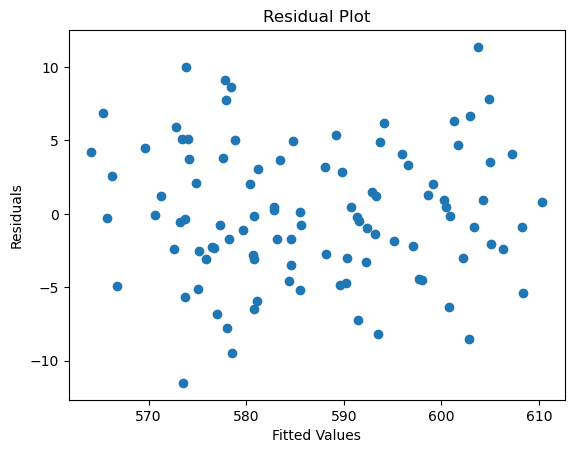

In [65]:
# 2. Identifying Heteroscedasticity

# a. Heteroscedasticity in the residuals
residuals = model.resid

# b. Diagnosing heteroscedasticity using a residual plot
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     193.6
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.43e-40
Time:                        11:41:47   Log-Likelihood:                 338.83
No. Observations:                 100   AIC:                            -669.7
Df Residuals:                      96   BIC:                            -659.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2554      0

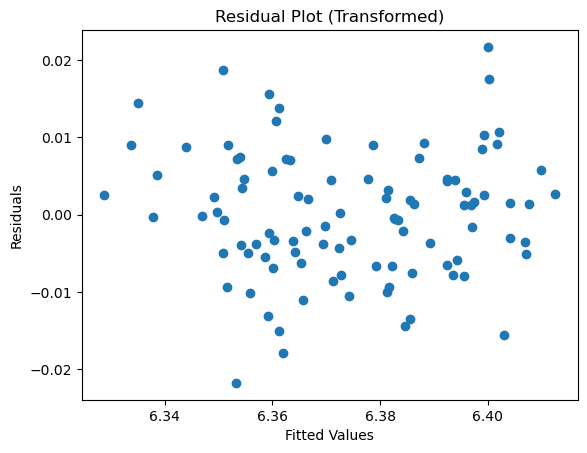

In [66]:
# 3. Remedying Heteroscedasticity

# Transforming variables to address heteroscedasticity (e.g., log transformation)
X['Experience'] = np.log(X['Experience'])
X['Education_Level'] = np.log(X['Education_Level'])
X['Projects_Completed'] = np.log(X['Projects_Completed'])
y = np.log(y)

# Fit a new model after transforming the variables
model_transformed = sm.OLS(y, X).fit()
print(model_transformed.summary())

# Check if heteroscedasticity is resolved in the transformed model
residuals_transformed = model_transformed.resid
plt.scatter(model_transformed.fittedvalues, residuals_transformed)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Transformed)')
plt.show()

In [67]:
# 4. Detecting Multicollinearity

# Calculate the correlation matrix to identify highly correlated variables
correlation_matrix = data.corr()
print(correlation_matrix)

# Calculate Variance Inflation Factors (VIF) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Experience  Education_Level  Projects_Completed  \
Experience            1.000000         0.111729            0.076116   
Education_Level       0.111729         1.000000            0.056035   
Projects_Completed    0.076116         0.056035            1.000000   
Performance           0.398571         0.810261            0.409656   

                    Performance  
Experience             0.398571  
Education_Level        0.810261  
Projects_Completed     0.409656  
Performance            1.000000  
             Variable            VIF
0               const  386433.310062
1          Experience       1.018672
2     Education_Level       1.015709
3  Projects_Completed       1.007404


In [69]:
# Task 5: Mitigating Multicollinearity

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=2)  # Select the best 2 features
X_selected = selector.fit_transform(X, y)

# Print the selected features
selected_features = X.columns[selector.get_support()]
print(f'Selected features to mitigate multicollinearity: {selected_features}')

# Rebuild the model with selected features
X_reduced = X[selected_features]
model_reduced = sm.OLS(y, X_reduced).fit()
print(model_reduced.summary())

# Evaluate the model's performance
y_pred = model_reduced.predict(X_reduced)

# Calculate R-squared for the improved model
r2_improved = r2_score(y, y_pred)
print(f'R-squared for the improved model: {r2_improved}')

# Calculate other evaluation metrics (MAE, MSE, RMSE) for the improved model
mae_improved = mean_absolute_error(y, y_pred)
mse_improved = mean_squared_error(y, y_pred)
rmse_improved = np.sqrt(mse_improved)

print(f'MAE for the improved model: {mae_improved}')
print(f'MSE for the improved model: {mse_improved}')
print(f'RMSE for the improved model: {rmse_improved}')



Selected features to mitigate multicollinearity: Index(['Education_Level', 'Projects_Completed'], dtype='object')
                                 OLS Regression Results                                
Dep. Variable:            Performance   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.818e+07
Date:                Mon, 30 Oct 2023   Prob (F-statistic):                   1.25e-273
Time:                        11:46:07   Log-Likelihood:                          314.08
No. Observations:                 100   AIC:                                     -624.2
Df Residuals:                      98   BIC:                                     -618.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
      